In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from  xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [35]:
df = pd.read_csv('hypothyroid.csv')
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


# EDA

In [36]:
df.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

In [37]:
df.duplicated().sum()

61

In [38]:
df.drop_duplicates(keep = False, inplace = True)

In [39]:
df=df.replace({"?":np.NAN})

C:\Users\Dell\AppData\Local\Temp/ipykernel_18616/2410407433.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({"?":np.NAN})


In [40]:
df.isnull().sum()

age                             1
sex                           148
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           277
T3 measured                     0
T3                            677
TT4 measured                    0
TT4                           139
T4U measured                    0
T4U                           295
FTI measured                    0
FTI                           293
TBG measured                    0
TBG                          3678
referral source                 0
binaryClass   

In [41]:
df.shape

(3678, 30)

In [42]:
df=df.replace({"t":1,"f":0})

C:\Users\Dell\AppData\Local\Temp/ipykernel_18616/2701917258.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({"t":1,"f":0})


In [43]:
df["binaryClass"].value_counts()

binaryClass
P    3387
N     291
Name: count, dtype: int64

In [44]:
df["binaryClass"] = df["binaryClass"].replace({"P":1,"N":0})

C:\Users\Dell\AppData\Local\Temp/ipykernel_18616/3463602176.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["binaryClass"] = df["binaryClass"].replace({"P":1,"N":0})


In [45]:
df=df.replace({'SVI': 0, 'SVHC': 1, 'STMW': 2,'SVHD':3,'other':4})

C:\Users\Dell\AppData\Local\Temp/ipykernel_18616/2089374315.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'SVI': 0, 'SVHC': 1, 'STMW': 2,'SVHD':3,'other':4})


In [46]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,NaN,1,1
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,NaN,0,NaN,0,NaN,4,1
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,NaN,4,1
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,NaN,0,NaN,0,NaN,4,1
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,4,1
3768,68,F,0,0,0,0,0,0,0,0,...,1,124,1,1.08,1,114,0,NaN,0,1
3769,74,F,0,0,0,0,0,0,0,0,...,1,112,1,1.07,1,105,0,NaN,4,1
3770,72,M,0,0,0,0,0,0,0,0,...,1,82,1,0.94,1,87,0,NaN,0,1


In [47]:
df["sex"].value_counts()

sex
F    2396
M    1134
Name: count, dtype: int64

In [48]:
df['sex']=df['sex'].replace({"F":1,"M":0})

C:\Users\Dell\AppData\Local\Temp/ipykernel_18616/1847862550.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex']=df['sex'].replace({"F":1,"M":0})


In [49]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
T

In [50]:
df["age"].value_counts()

age
59     95
60     89
70     87
73     81
55     78
       ..
10      1
4       1
5       1
455     1
6       1
Name: count, Length: 93, dtype: int64

In [51]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
T

In [52]:
df.isna().sum()

age                             1
sex                           148
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           277
T3 measured                     0
T3                            677
TT4 measured                    0
TT4                           139
T4U measured                    0
T4U                           295
FTI measured                    0
FTI                           293
TBG measured                    0
TBG                          3678
referral source                 0
binaryClass   

In [53]:
df.dropna(axis = 0, thresh = 20, inplace = True)
df.isna().sum()

age                             1
sex                           148
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           277
T3 measured                     0
T3                            677
TT4 measured                    0
TT4                           139
T4U measured                    0
T4U                           295
FTI measured                    0
FTI                           293
TBG measured                    0
TBG                          3678
referral source                 0
binaryClass   

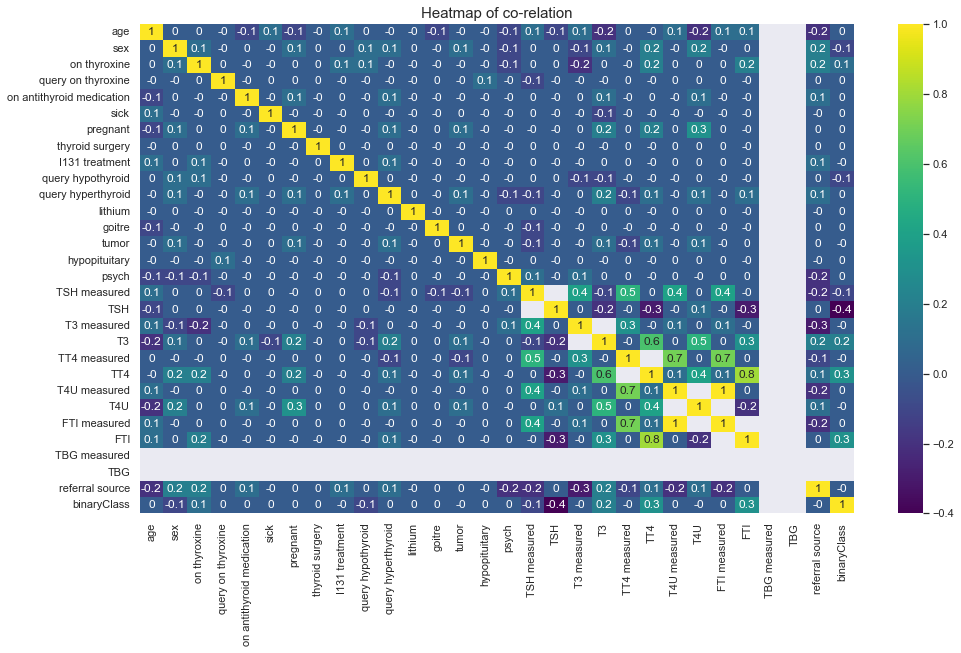

In [54]:
#Building heatmap to checking correlations
sns.heatmap(round(df.corr(), 1),annot=True,cmap='viridis')
sns.set(rc={'figure.figsize':(20,20)})
plt.title('Heatmap of co-relation',fontsize=15)
plt.show()

In [55]:
df = df.interpolate(method = 'spline', order = 3)
df.isna().sum()

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                             0
T3 measured                     0
T3                              0
TT4 measured                    0
TT4                             0
T4U measured                    0
T4U                             0
FTI measured                    0
FTI                             0
TBG measured                    0
TBG                          3678
referral source                 0
binaryClass   

In [56]:
del_cols=['TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG']
for col in del_cols:
    del df[col]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3678 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3678 non-null   float64
 1   sex                        3678 non-null   float64
 2   on thyroxine               3678 non-null   int64  
 3   query on thyroxine         3678 non-null   int64  
 4   on antithyroid medication  3678 non-null   int64  
 5   sick                       3678 non-null   int64  
 6   pregnant                   3678 non-null   int64  
 7   thyroid surgery            3678 non-null   int64  
 8   I131 treatment             3678 non-null   int64  
 9   query hypothyroid          3678 non-null   int64  
 10  query hyperthyroid         3678 non-null   int64  
 11  lithium                    3678 non-null   int64  
 12  goitre                     3678 non-null   int64  
 13  tumor                      3678 non-null   int64  
 1

# Model definition

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'binaryClass'), df['binaryClass'], test_size=0.30, random_state=42) 

In [58]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
from sklearn.metrics import accuracy_score, classification_report
y_pred= xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, xgb_clf.predict(X_test))
print(accuracy)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        77
           1       1.00      0.99      0.99      1027

    accuracy                           0.98      1104
   macro avg       0.91      0.96      0.93      1104
weighted avg       0.98      0.98      0.98      1104

0.9818840579710145


# Confusion matrix

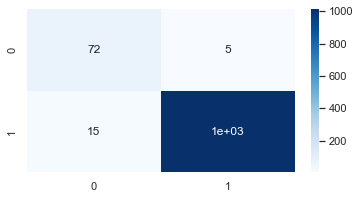

In [60]:
plt.rcParams["figure.figsize"] = (6,3)
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.show()

# ROC AUC

No Skill: ROC AUC=0.500
XGBClassifier: ROC AUC=0.995


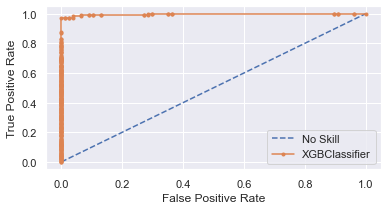

In [61]:
y_prob = xgb_clf.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
y_prob = y_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBClassifier')
# axis labels
plt.rcParams["figure.figsize"] = (16,9)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [62]:
test_query=X_test.iloc[59].values.reshape(1,-1)
test_query

array([[ 81.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          3.9 ,   1.8 , 131.  ,   0.98, 133.  ,   0.  ]])

In [63]:
result=xgb_clf.predict(test_query)
print(result)

if result==0:
    print('negative')
else:
    print('positive')

[1]
positive


In [64]:
import pickle

with open('model2.pkl','wb') as f:
    pickle.dump(xgb_clf,f)

In [65]:
with open('model2.pkl','rb') as f:
    model=pickle.load(f)

In [66]:
diagnoses = {
    0: 'negative',
    1: 'positive',
}

output=model.predict(test_query)
prediction=diagnoses.get(output[0])
print(prediction)

positive
